# 1. Import
## 1.1. Librairies

In [2]:
import scanpy as sc
import anndata
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

## 1.2. Data

In [3]:
poon_data = sc.read_h5ad("/Users/scarcy/Projects/HumanThymusProject/data/raw_data/human_data/poon-farber/BarrierImmunity_Cleaned.h5ad")
print(poon_data)

AnnData object with n_obs × n_vars = 54725 × 60725
    obs: 'donor', 'tissue', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'leiden', 'clust'
    var: 'Accession', 'Gene'
    uns: 'ff_save_history'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


First glance at the data

/Users/scarcy/opt/anaconda3/envs/humanthymusproj/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


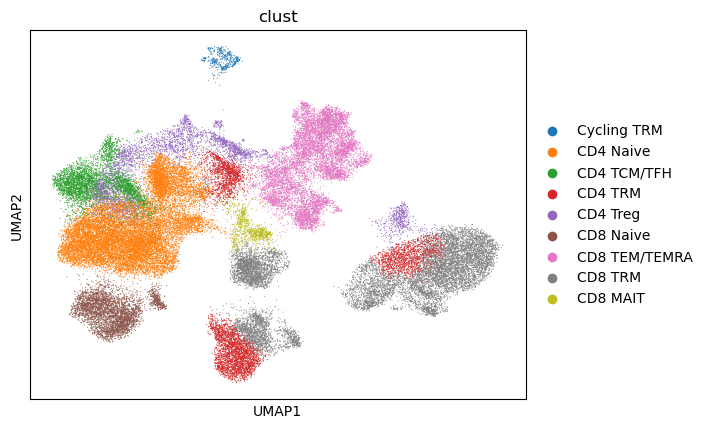

/Users/scarcy/opt/anaconda3/envs/humanthymusproj/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


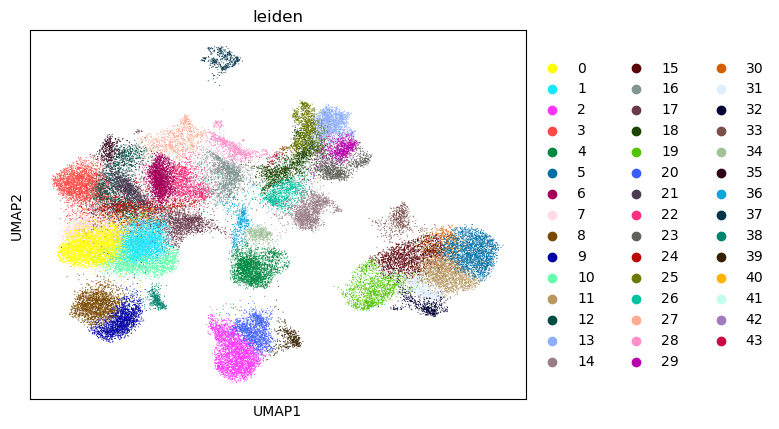

/Users/scarcy/opt/anaconda3/envs/humanthymusproj/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


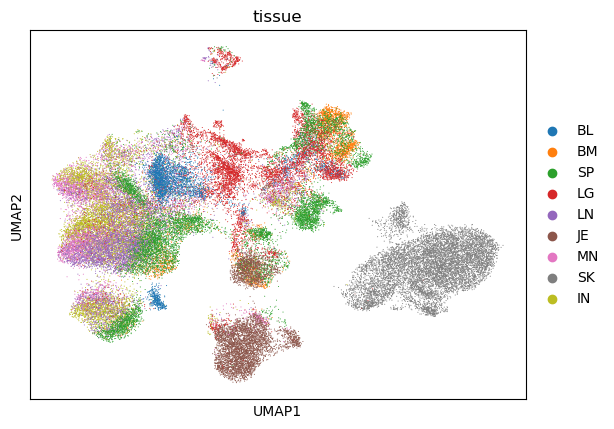

In [4]:
plt.style.use('default')
sc.pl.umap(poon_data, color="clust")
sc.pl.umap(poon_data, color="leiden")
sc.pl.umap(poon_data, color="tissue")

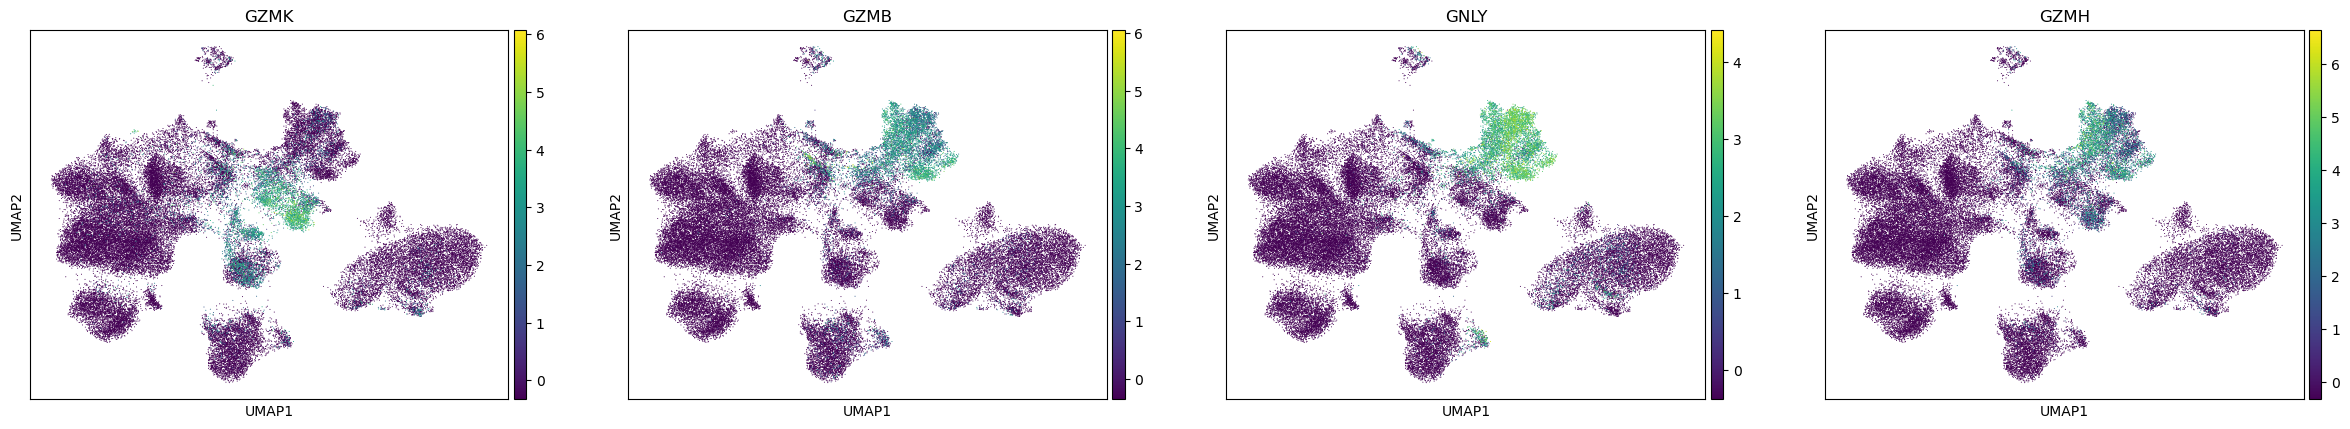

In [6]:
sc.pl.umap(poon_data, color=["GZMK", "GZMB", "GNLY", "GZMH"], use_raw=False)

In [9]:
poon_data.obs
#poon_data.X[0:20,0:20].todense()

donor tissue  total_counts  n_genes_by_counts  \
cell_barcode                                                            
AAACCTGAGTATGACA_D492-0  D492     BM        8603.0               2286   
AAACCTGGTAGTGAAT_D492-0  D492     BM        4378.0               1386   
AAACCTGGTATCAGTC_D492-0  D492     BM        7411.0               2367   
AAACCTGGTCTCTCTG_D492-0  D492     BM        6481.0               2037   
AAACCTGGTTAAGAAC_D492-0  D492     BM        7497.0               2214   
...                       ...    ...           ...                ...   
TTTGTCACAGGCAGTA_D511-1  D511     SP        5323.0               1580   
TTTGTCACAGTAAGAT_D511-1  D511     SP        4148.0               1310   
TTTGTCACATTCTTAC_D511-1  D511     SP        7298.0               2005   
TTTGTCAGTACAAGTA_D511-1  D511     SP       16228.0               3432   
TTTGTCAGTTATCACG_D511-1  D511     SP        3861.0               1260   

                         percent_mito leiden      clust  
cell_barcode                                             
AAACCTGAGTATGACA_D492-0      0.094618      4    CD8 TRM  
AAACCTGGTAGTGAAT_D492-0      0.063271      4    CD8 TRM  
AAACCTGGTATCAGTC_D492-0      0.068547     34   CD8 MAIT  
AAACCTGGTCTCTCTG_D492-0      0.051844     17  CD4 Naive  
AAACCTGGTTAAGAAC_D492-0      0.053621      4    CD8 TRM  
...                               ...    ...        ...  
TTTGTCACAGGCAGTA_D511-1      0.039451      9  CD8 Naive  
TTTGTCACAGTAAGAT_D511-1      0.030858      1  CD4 Naive  
TTTGTCACATTCTTAC_D511-1      0.042066     10  CD4 Naive  
TTTGTCAGTACAAGTA_D511-1      0.041841     17  CD4 Naive  
TTTGTCAGTTATCACG_D511-1      0.051541     17  CD4 Naive  

[54725 rows x 7 columns]

# 2. Score Laurent's GEPs
## 2.1. Prepare data

In [4]:
# gep_topgenes = pd.read_csv("/Users/scarcy/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnParkData/genes_per_GEP_df_2023-04-07.csv", index_col=0)
gep_topgenes = pd.read_csv("/Users/scarcy/Projects/HumanThymusProject/data/human-PBMC/HumanData_22_CompareGeneLists/genes_per_gep_post_rank_threshold.csv", index_col=0)

gep_topgenes
# gep_topgenes.loc[:,"GEP_1"].dropna().tolist()

GEP1    GEP2        GEP3    GEP4      GEP5        GEP6        GEP7  \
rank                                                                         
1       PRR5  RNASE6      SMURF2  CX3CR1      DSC1       FXYD1        PPT1   
2        LTK   ELFN1        CDH1  FGFBP2  CFAP97D2        PI16       VPS53   
3       ITCH   EPHA2       DAPK2  LILRB1     MMP28  ST6GALNAC1       ATG10   
4     PLXND1    SAT2  AC005332.3  PRSS23    SLC7A8      GPR183  AP003352.1   
5      SPCS3    CCR9       CD101    GZMH     NRCAM        LMNA    SNRK.AS1   
...      ...     ...         ...     ...       ...         ...         ...   
1117     NaN     NaN         NaN     NaN       NaN         NaN         NaN   
1118     NaN     NaN         NaN     NaN       NaN         NaN         NaN   
1119     NaN     NaN         NaN     NaN       NaN         NaN         NaN   
1120     NaN     NaN         NaN     NaN       NaN         NaN         NaN   
1121     NaN     NaN         NaN     NaN       NaN         NaN         NaN   

         GEP8        GEP9    GEP10       GEP11     GEP12  
rank                                                      
1     TMEM163  AC008074.2     CPA4     LAPTM4B      SKA3  
2        FGD4        UCA1   PFKFB2     ZC3H12C     NCAPH  
3       NRROS        GNG4     PIGZ       DUSP4      PLK4  
4       PPM1H      PTPN14    RGPD3       TNIP3  RAD51AP1  
5        RTP5      GCSAML  TNFAIP2      LRRC32     PCLAF  
...       ...         ...      ...         ...       ...  
1117      NaN         NaN      NaN        SMG9       NaN  
1118      NaN         NaN      NaN        GARS       NaN  
1119      NaN         NaN      NaN        MED8       NaN  
1120      NaN         NaN      NaN  PIK3CD.AS1       NaN  
1121      NaN         NaN      NaN      TMEM60       NaN  

[1121 rows x 12 columns]

In [224]:
poon_effector = pd.read_csv("/Users/scarcy/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnPoonData/poon_effector_signatures.csv", index_col=0)

# Keep only genes significantly DE and with positive log2FC
poon_eff1 = poon_effector.iloc[:,0:3]
poon_eff1 = poon_eff1.loc[(poon_eff1["Effector 1_pvals_adj"] < 0.05) & (poon_eff1["Effector 1_logfoldchanges"]>0)]

poon_eff2 = poon_effector.iloc[:,3:6]
poon_eff2 = poon_eff2.loc[(poon_eff2["Effector 2_pvals_adj"] < 0.05) & (poon_eff2["Effector 2_logfoldchanges"]>0)]

In [4]:
# Normalize & scale
sc.pp.normalize_total(poon_data, target_sum=1e4)
sc.pp.log1p(poon_data)
poon_data.raw = poon_data # not sure what this does
sc.pp.scale(poon_data, max_value=10, zero_center=True)

## 2.2. Check nb of genes from Poon data present in GEP lists

In [5]:
# Function to count elements present in array 1 vs array 2
def count_genes(gep, poon_genes=poon_data.var_names):
    gep_genes = gep_topgenes.loc[:,gep].dropna().tolist()
    nbgenes_present = set(gep_genes) & set(poon_genes)
    nbgenes_absent  = set(gep_genes) - set(poon_genes)
    # Print
    print("Nb of GEP genes:", len(set(gep_genes)))
    print("Nb of GEP genes present in Poon data:", len(nbgenes_present))
    print("Nb of GEP genes absent from Poon data:", len(nbgenes_absent))

# Check for GEPs of interest
print("GEP1")
count_genes(gep="GEP1")
print("GEP4")
count_genes(gep="GEP4")
print("GEP5")
count_genes(gep="GEP5")
print("GEP6")
count_genes(gep="GEP6")

GEP1
Nb of GEP genes: 503
Nb of GEP genes present in Poon data: 457
Nb of GEP genes absent from Poon data: 46
GEP4
Nb of GEP genes: 471
Nb of GEP genes present in Poon data: 414
Nb of GEP genes absent from Poon data: 57
GEP5
Nb of GEP genes: 705
Nb of GEP genes present in Poon data: 588
Nb of GEP genes absent from Poon data: 117
GEP6
Nb of GEP genes: 500
Nb of GEP genes present in Poon data: 425
Nb of GEP genes absent from Poon data: 75


## 2.3. Compute gene scores

In [6]:
# Laurent's GEPs
sc.tl.score_genes(poon_data, gene_list=gep_topgenes.loc[:,"GEP1"].dropna().tolist(), score_name="GEP1", use_raw=False)
sc.tl.score_genes(poon_data, gene_list=gep_topgenes.loc[:,"GEP4"].dropna().tolist(), score_name="GEP4", use_raw=False)
sc.tl.score_genes(poon_data, gene_list=gep_topgenes.loc[:,"GEP5"].dropna().tolist(), score_name="GEP5", use_raw=False)
sc.tl.score_genes(poon_data, gene_list=gep_topgenes.loc[:,"GEP6"].dropna().tolist(), score_name="GEP6", use_raw=False)

# # Paper effector 1/2 signatures
# sc.tl.score_genes(poon_data, gene_list=poon_eff1.loc[:,"Effector 1_names"].dropna().tolist()[0:200], score_name="Effector1")
# sc.tl.score_genes(poon_data, gene_list=poon_eff2.loc[:,"Effector 2_names"].dropna().tolist()[0:200], score_name="Effector2")

In [6]:
poon_data.obs
# pd.DataFrame(poon_data.obs).to_csv("~/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnPoonData/poon_metadata_withGEPs_2023-08-04.csv")

donor tissue  total_counts  n_genes_by_counts  \
cell_barcode                                                            
AAACCTGAGTATGACA_D492-0  D492     BM        8603.0               2286   
AAACCTGGTAGTGAAT_D492-0  D492     BM        4378.0               1386   
AAACCTGGTATCAGTC_D492-0  D492     BM        7411.0               2367   
AAACCTGGTCTCTCTG_D492-0  D492     BM        6481.0               2037   
AAACCTGGTTAAGAAC_D492-0  D492     BM        7497.0               2214   
...                       ...    ...           ...                ...   
TTTGTCACAGGCAGTA_D511-1  D511     SP        5323.0               1580   
TTTGTCACAGTAAGAT_D511-1  D511     SP        4148.0               1310   
TTTGTCACATTCTTAC_D511-1  D511     SP        7298.0               2005   
TTTGTCAGTACAAGTA_D511-1  D511     SP       16228.0               3432   
TTTGTCAGTTATCACG_D511-1  D511     SP        3861.0               1260   

                         percent_mito leiden      clust  
cell_barcode                                             
AAACCTGAGTATGACA_D492-0      0.094618      4    CD8 TRM  
AAACCTGGTAGTGAAT_D492-0      0.063271      4    CD8 TRM  
AAACCTGGTATCAGTC_D492-0      0.068547     34   CD8 MAIT  
AAACCTGGTCTCTCTG_D492-0      0.051844     17  CD4 Naive  
AAACCTGGTTAAGAAC_D492-0      0.053621      4    CD8 TRM  
...                               ...    ...        ...  
TTTGTCACAGGCAGTA_D511-1      0.039451      9  CD8 Naive  
TTTGTCACAGTAAGAT_D511-1      0.030858      1  CD4 Naive  
TTTGTCACATTCTTAC_D511-1      0.042066     10  CD4 Naive  
TTTGTCAGTACAAGTA_D511-1      0.041841     17  CD4 Naive  
TTTGTCAGTTATCACG_D511-1      0.051541     17  CD4 Naive  

[54725 rows x 7 columns]

In [7]:
metadata = pd.read_csv("~/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnPoonData/poon_metadata_withGEPs_2023-08-04.csv")
poon_data.obs = metadata
poon_data.obs

cell_barcode donor tissue  total_counts  n_genes_by_counts  \
0      AAACCTGAGTATGACA_D492-0  D492     BM        8603.0               2286   
1      AAACCTGGTAGTGAAT_D492-0  D492     BM        4378.0               1386   
2      AAACCTGGTATCAGTC_D492-0  D492     BM        7411.0               2367   
3      AAACCTGGTCTCTCTG_D492-0  D492     BM        6481.0               2037   
4      AAACCTGGTTAAGAAC_D492-0  D492     BM        7497.0               2214   
...                        ...   ...    ...           ...                ...   
54720  TTTGTCACAGGCAGTA_D511-1  D511     SP        5323.0               1580   
54721  TTTGTCACAGTAAGAT_D511-1  D511     SP        4148.0               1310   
54722  TTTGTCACATTCTTAC_D511-1  D511     SP        7298.0               2005   
54723  TTTGTCAGTACAAGTA_D511-1  D511     SP       16228.0               3432   
54724  TTTGTCAGTTATCACG_D511-1  D511     SP        3861.0               1260   

       percent_mito  leiden      clust      GEP1      GEP4      GEP5      GEP6  
0          0.094618       4    CD8 TRM  0.222090  0.007684 -0.155292  0.097856  
1          0.063271       4    CD8 TRM  0.278600  0.057185 -0.163293  0.002803  
2          0.068547      34   CD8 MAIT  0.290006  0.147915 -0.161906 -0.011258  
3          0.051844      17  CD4 Naive  0.115695 -0.042412  0.016836  0.102726  
4          0.053621       4    CD8 TRM  0.186272  0.019633 -0.089519 -0.080978  
...             ...     ...        ...       ...       ...       ...       ...  
54720      0.039451       9  CD8 Naive  0.002239 -0.045007  0.208491 -0.004843  
54721      0.030858       1  CD4 Naive -0.026653 -0.033240  0.213566 -0.025705  
54722      0.042066      10  CD4 Naive  0.014213 -0.048710  0.290970  0.026048  
54723      0.041841      17  CD4 Naive -0.031508 -0.074033  0.242183  0.076835  
54724      0.051541      17  CD4 Naive -0.104343 -0.058151  0.034196 -0.049307  

[54725 rows x 12 columns]

## 2.4. Plot
### 2.4.1. Violin plots

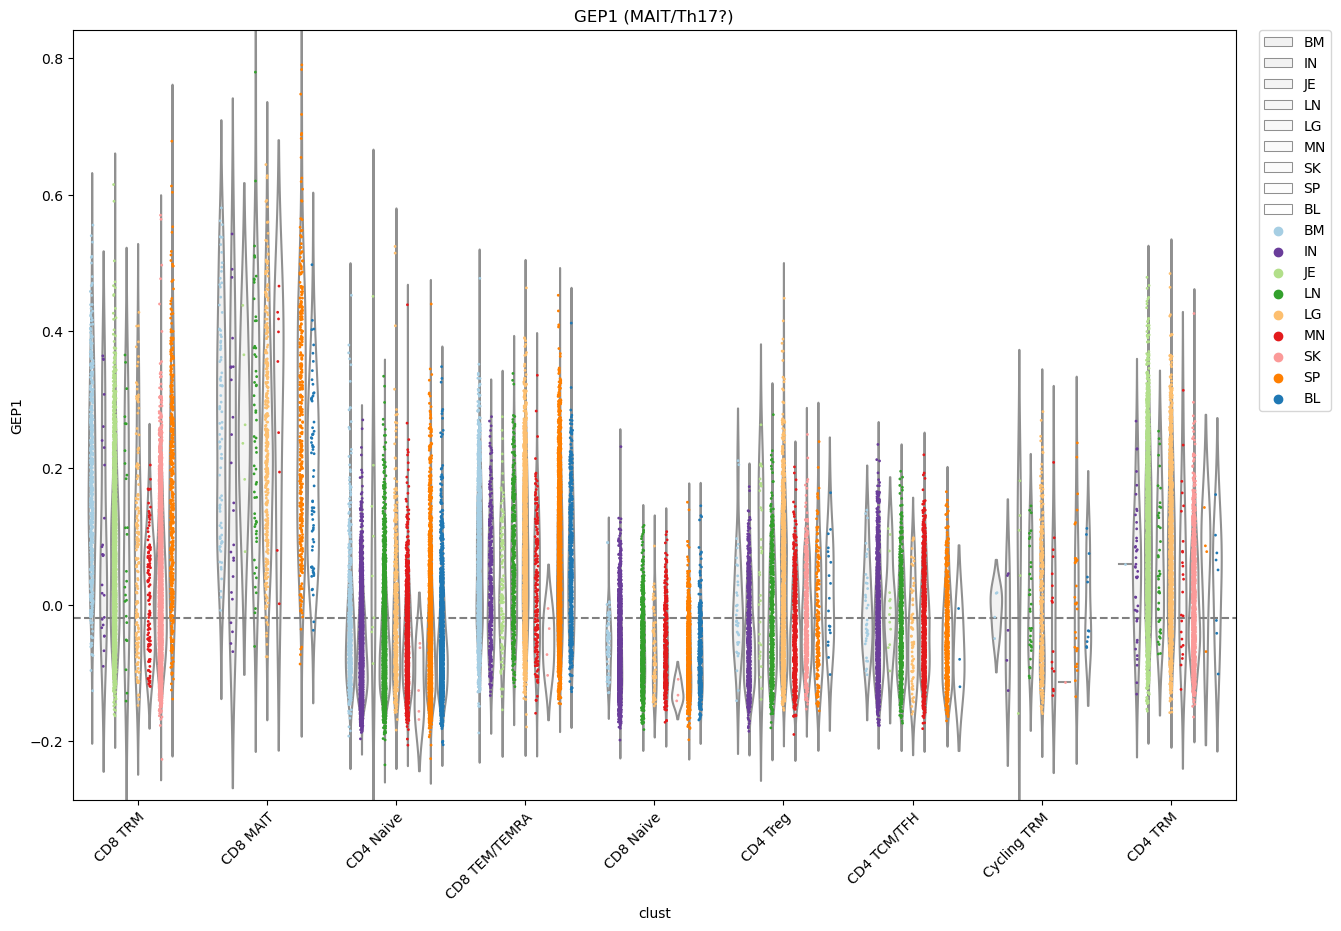

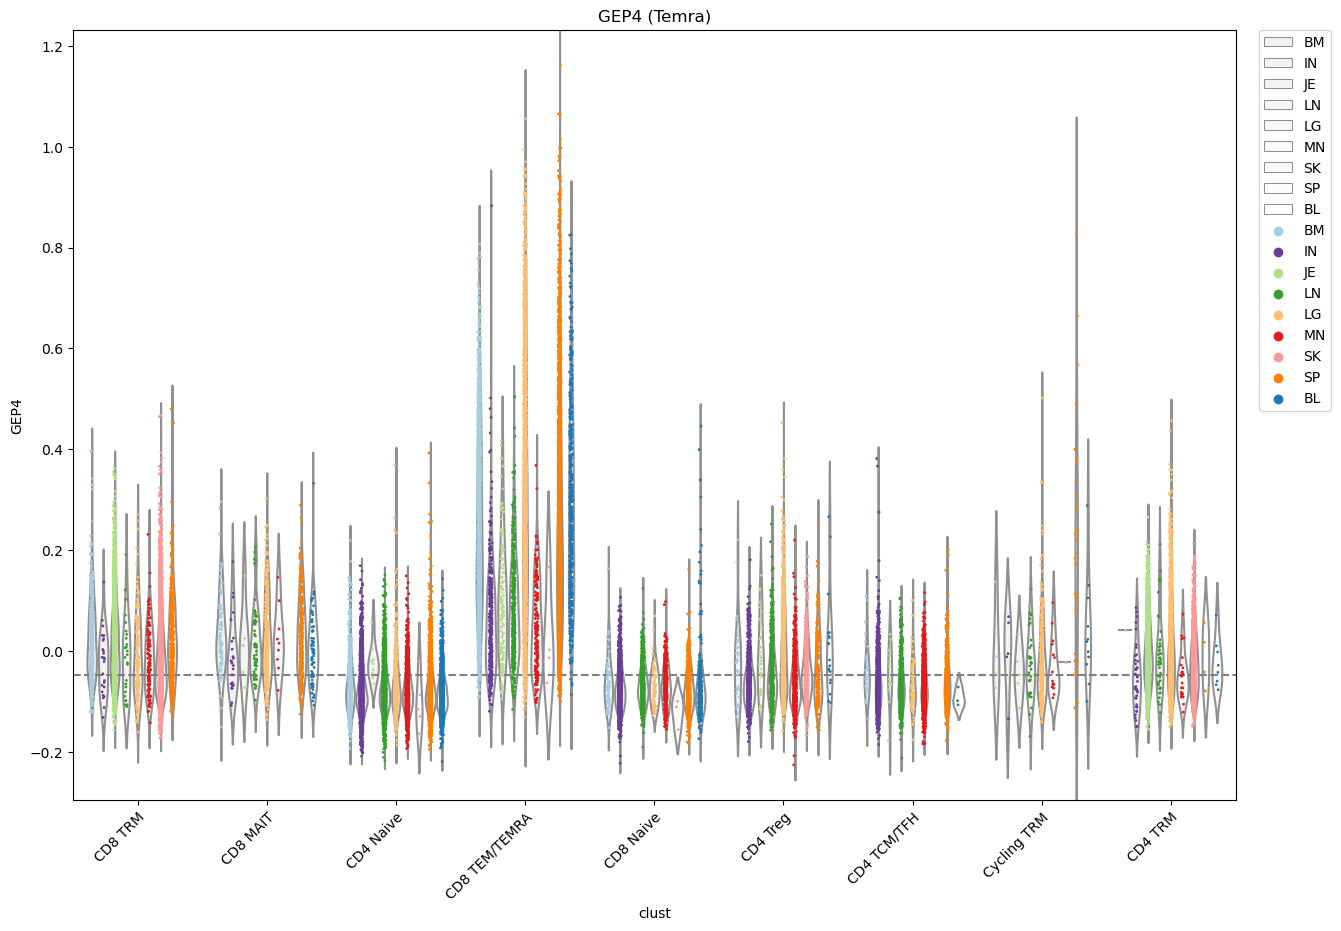

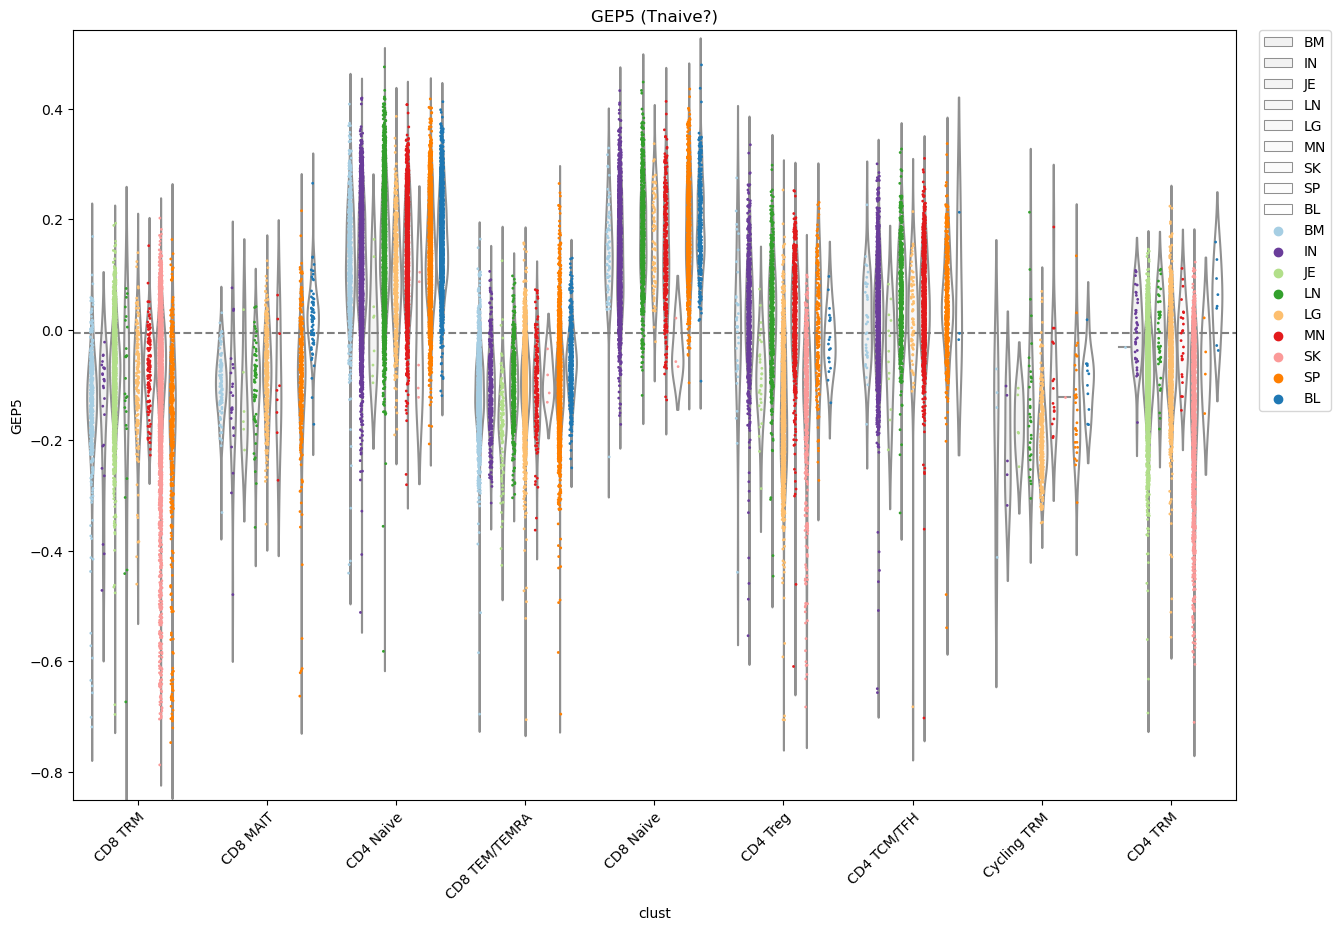

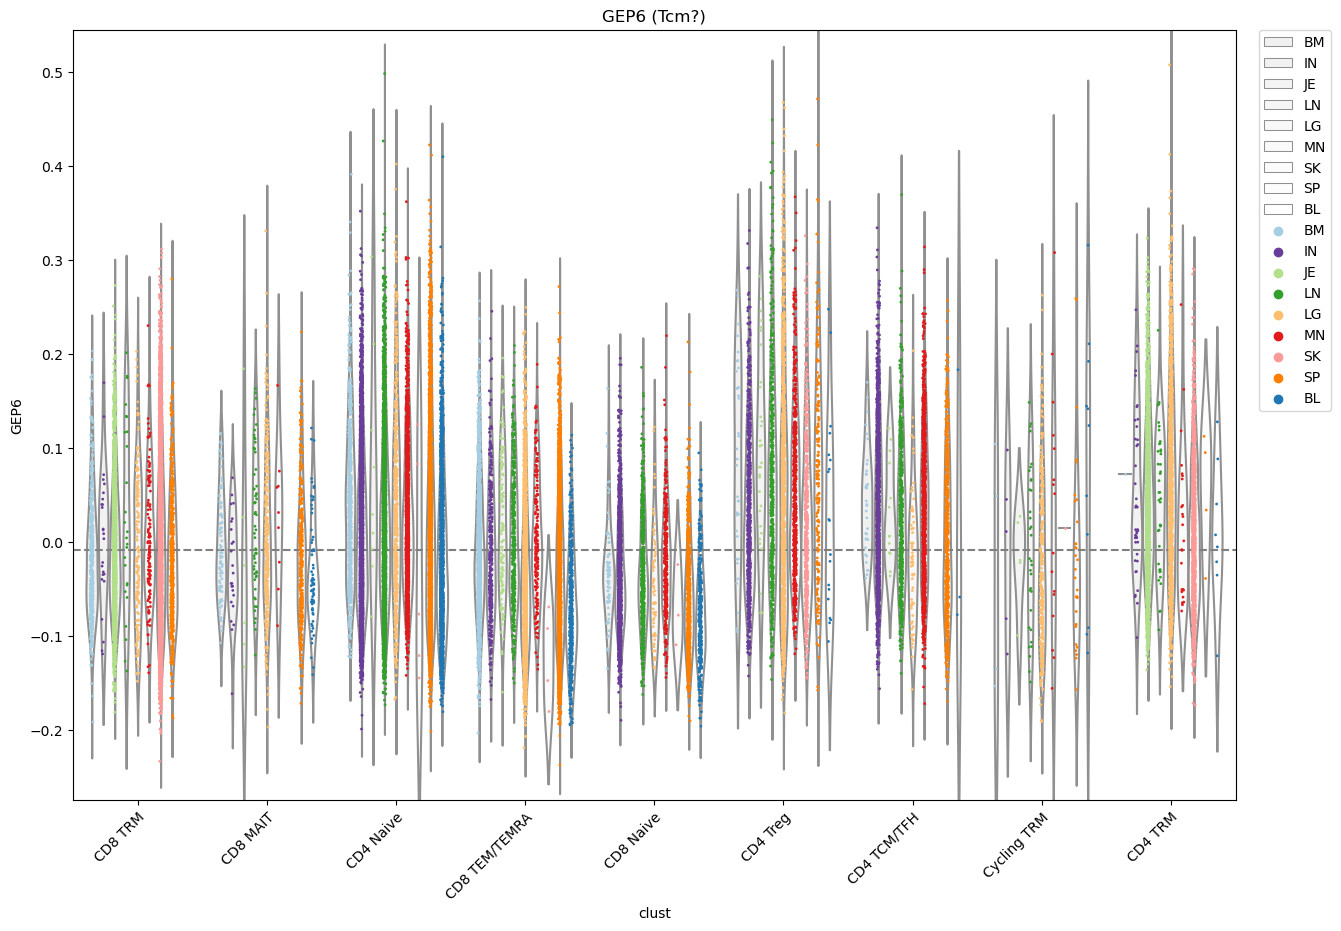

In [10]:
# Color palette
mypal = {
    "BL":"#1f78b4",
    "BM": "#a6cee3",
    "SP": "#ff7f00",
    "LG": "#fdbf6f",
    "LN": "#33a02c",
    "JE": "#b2df8a",
    "MN": "#e31a1c",
    "SK": "#fb9a99",
    "IN": "#6a3d9a"}

# Function to plot GEPs
def plot_vln(gep, title):
    plt.figure(figsize=(15,10))
    plt.axhline(y=np.median(poon_data.obs[gep]), linestyle="--", color="grey")
    ax=sns.violinplot(data=poon_data.obs, x="clust", y=gep, hue="tissue", color="white", inner=None)
    sns.stripplot(data=poon_data.obs, x="clust", y=gep, jitter=True, dodge=True, hue="tissue", palette=mypal, size=2)
    #plt.ylim(-0.2, 1)
    plt.title(title)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha="right", rotation_mode='anchor')
    plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", borderaxespad=0)
    # Save figure
    #filename="/Users/scarcy/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnPoonData/poon_cNMF_" + gep.lower() + "_vlnplot.jpeg"
    #plt.savefig(fname=filename, dpi=300)

# Run!
plot_vln(gep="GEP1", title="GEP1 (MAIT/Th17?)")
plot_vln(gep="GEP4", title="GEP4 (Temra)")
plot_vln(gep="GEP5", title="GEP5 (Tnaive?)")
plot_vln(gep="GEP6", title="GEP6 (Tcm?)")

Figure for paper:

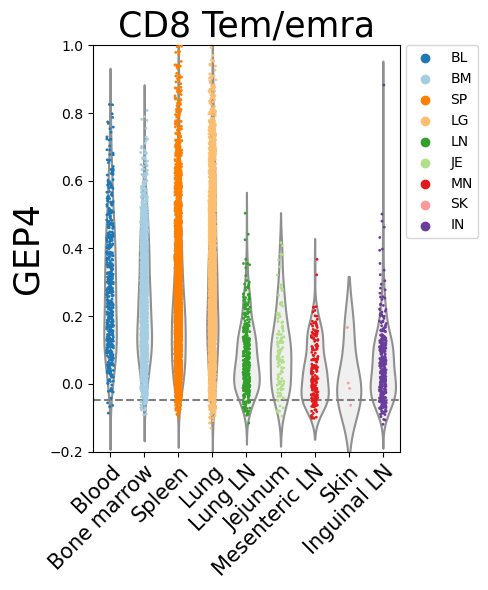

In [20]:
# Color palette
poon_data.obs['tissue_long'] = poon_data.obs['tissue'].map({'BM': 'Bone marrow',
                                                            'BL': 'Blood',
                                                            'SP': 'Spleen',
                                                            'LG': 'Lung',
                                                            'LN': 'Lung LN',
                                                            'JE': 'Jejunum',
                                                            'MN': 'Mesenteric LN',
                                                            'SK': 'Skin',
                                                            'IN': 'Inguinal LN'})
mypal2 = {
    "Blood":"#1f78b4",
    "Bone marrow": "#a6cee3",
    "Spleen": "#ff7f00",
    "Lung": "#fdbf6f",
    "Lung LN": "#33a02c",
    "Jejunum": "#b2df8a",
    "Mesenteric LN": "#e31a1c",
    "Skin": "#fb9a99",
    "Inguinal LN": "#6a3d9a"}

# Function to plot GEPs
def plot_vln(gep, title, subset_on_cluster):
    plt.figure(figsize=(5,6))
    plt.axhline(y=np.median(poon_data.obs[gep]), linestyle="--", color="grey")
    ax=sns.violinplot(data=poon_data.obs.loc[poon_data.obs["clust"]==subset_on_cluster], x="tissue_long", y=gep, order=mypal2.keys(), color="#f0f0f0", inner=None)
    sns.stripplot(data=poon_data.obs.loc[poon_data.obs["clust"]==subset_on_cluster], x="tissue_long", y=gep, order=mypal2.keys(), jitter=True, dodge=False, hue="tissue", palette=mypal, size=2)
    plt.ylim(-0.2, 1.0)
    plt.ylabel(gep, fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=10)
    plt.title(title, fontsize=25)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha="right", rotation_mode='anchor')
    ax.set(xlabel=None)
    # legend
    ax.get_legend().remove()
    #handles, labels = plt.gca().get_legend_handles_labels()
    #orderlegend = [8,0,7,4,3,2,5,6,1]
    #plt.legend([handles[idx] for idx in orderlegend],[labels[idx] for idx in orderlegend], bbox_to_anchor=(1.02,1), loc="upper left", borderaxespad=0)
    plt.tight_layout()
    # Save figure
    filename="/Users/scarcy/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnPoonData/plots_figure/poon_cNMF_" + gep.lower() + "_vlnplot2_newgeplist.pdf"
    plt.savefig(fname=filename, dpi=300, format="pdf")

# Run!
plot_vln(gep="GEP1", title="CD8 MAIT", subset_on_cluster="CD8 MAIT")
plot_vln(gep="GEP4", title="CD8 Tem/emra", subset_on_cluster="CD8 TEM/TEMRA")
#plot_vln(gep="GEP5", title="CD8 Naive", subset_on_cluster="CD8 Naive")
plot_vln(gep="GEP6", title="CD4 Tcm/fh", subset_on_cluster="CD4 TCM/TFH")

# trying to combine but doesn't work
# fig, axs = plt.subplots(3)
#axs[0].plot_vln(gep="GEP1", title="CD8 MAIT", subset_on_cluster="CD8 MAIT")
#axs[1].plot_vln(gep="GEP4", title="CD8 Tem/emra", subset_on_cluster="CD8 TEM/TEMRA")
#axs[2].plot_vln(gep="GEP6", title="CD4 Tcm/fh", subset_on_cluster="CD4 TCM/TFH")

In [12]:
mypal2.keys()

dict_keys(['Blood', 'Bone marrow', 'Spleen', 'Lung', 'Lung LN', 'Jejunum', 'Mesenteric LN', 'Skin', 'Inguinal LN'])

In [37]:
poon_data.obs.tissue.unique()
poon_data.obs['tissue_long'] = poon_data.obs['tissue'].map({'BM': 'Bone marrow',
                                                            'BL': 'Blood',
                                                            'SP': 'Spleen',
                                                            'LG': 'Lung',
                                                            'LN': 'Lung LN',
                                                            'JE': 'Jejunum',
                                                            'MN': 'Mesenteric LN',
                                                            'SK': 'Skin',
                                                            'IN': 'Inguinal LN'})

In [16]:
poon_data.obs

donor tissue  total_counts  n_genes_by_counts  \
cell_barcode                                                            
AAACCTGAGTATGACA_D492-0  D492     BM        8603.0               2286   
AAACCTGGTAGTGAAT_D492-0  D492     BM        4378.0               1386   
AAACCTGGTATCAGTC_D492-0  D492     BM        7411.0               2367   
AAACCTGGTCTCTCTG_D492-0  D492     BM        6481.0               2037   
AAACCTGGTTAAGAAC_D492-0  D492     BM        7497.0               2214   
...                       ...    ...           ...                ...   
TTTGTCACAGGCAGTA_D511-1  D511     SP        5323.0               1580   
TTTGTCACAGTAAGAT_D511-1  D511     SP        4148.0               1310   
TTTGTCACATTCTTAC_D511-1  D511     SP        7298.0               2005   
TTTGTCAGTACAAGTA_D511-1  D511     SP       16228.0               3432   
TTTGTCAGTTATCACG_D511-1  D511     SP        3861.0               1260   

                         percent_mito leiden      clust      GEP1      GEP4  \
cell_barcode                                                                  
AAACCTGAGTATGACA_D492-0      0.094618      4    CD8 TRM  0.222090  0.007684   
AAACCTGGTAGTGAAT_D492-0      0.063271      4    CD8 TRM  0.278600  0.057185   
AAACCTGGTATCAGTC_D492-0      0.068547     34   CD8 MAIT  0.290006  0.147915   
AAACCTGGTCTCTCTG_D492-0      0.051844     17  CD4 Naive  0.115695 -0.042412   
AAACCTGGTTAAGAAC_D492-0      0.053621      4    CD8 TRM  0.186272  0.019633   
...                               ...    ...        ...       ...       ...   
TTTGTCACAGGCAGTA_D511-1      0.039451      9  CD8 Naive  0.002239 -0.045007   
TTTGTCACAGTAAGAT_D511-1      0.030858      1  CD4 Naive -0.026653 -0.033240   
TTTGTCACATTCTTAC_D511-1      0.042066     10  CD4 Naive  0.014213 -0.048710   
TTTGTCAGTACAAGTA_D511-1      0.041841     17  CD4 Naive -0.031508 -0.074033   
TTTGTCAGTTATCACG_D511-1      0.051541     17  CD4 Naive -0.104343 -0.058151   

                             GEP5      GEP6  tissue_long  
cell_barcode                                              
AAACCTGAGTATGACA_D492-0 -0.155292  0.097856  Bone marrow  
AAACCTGGTAGTGAAT_D492-0 -0.163293  0.002803  Bone marrow  
AAACCTGGTATCAGTC_D492-0 -0.161906 -0.011258  Bone marrow  
AAACCTGGTCTCTCTG_D492-0  0.016836  0.102726  Bone marrow  
AAACCTGGTTAAGAAC_D492-0 -0.089519 -0.080978  Bone marrow  
...                           ...       ...          ...  
TTTGTCACAGGCAGTA_D511-1  0.208491 -0.004843       Spleen  
TTTGTCACAGTAAGAT_D511-1  0.213566 -0.025705       Spleen  
TTTGTCACATTCTTAC_D511-1  0.290970  0.026048       Spleen  
TTTGTCAGTACAAGTA_D511-1  0.242183  0.076835       Spleen  
TTTGTCAGTTATCACG_D511-1  0.034196 -0.049307       Spleen  

[54725 rows x 12 columns]

### 2.4.2. UMAPs

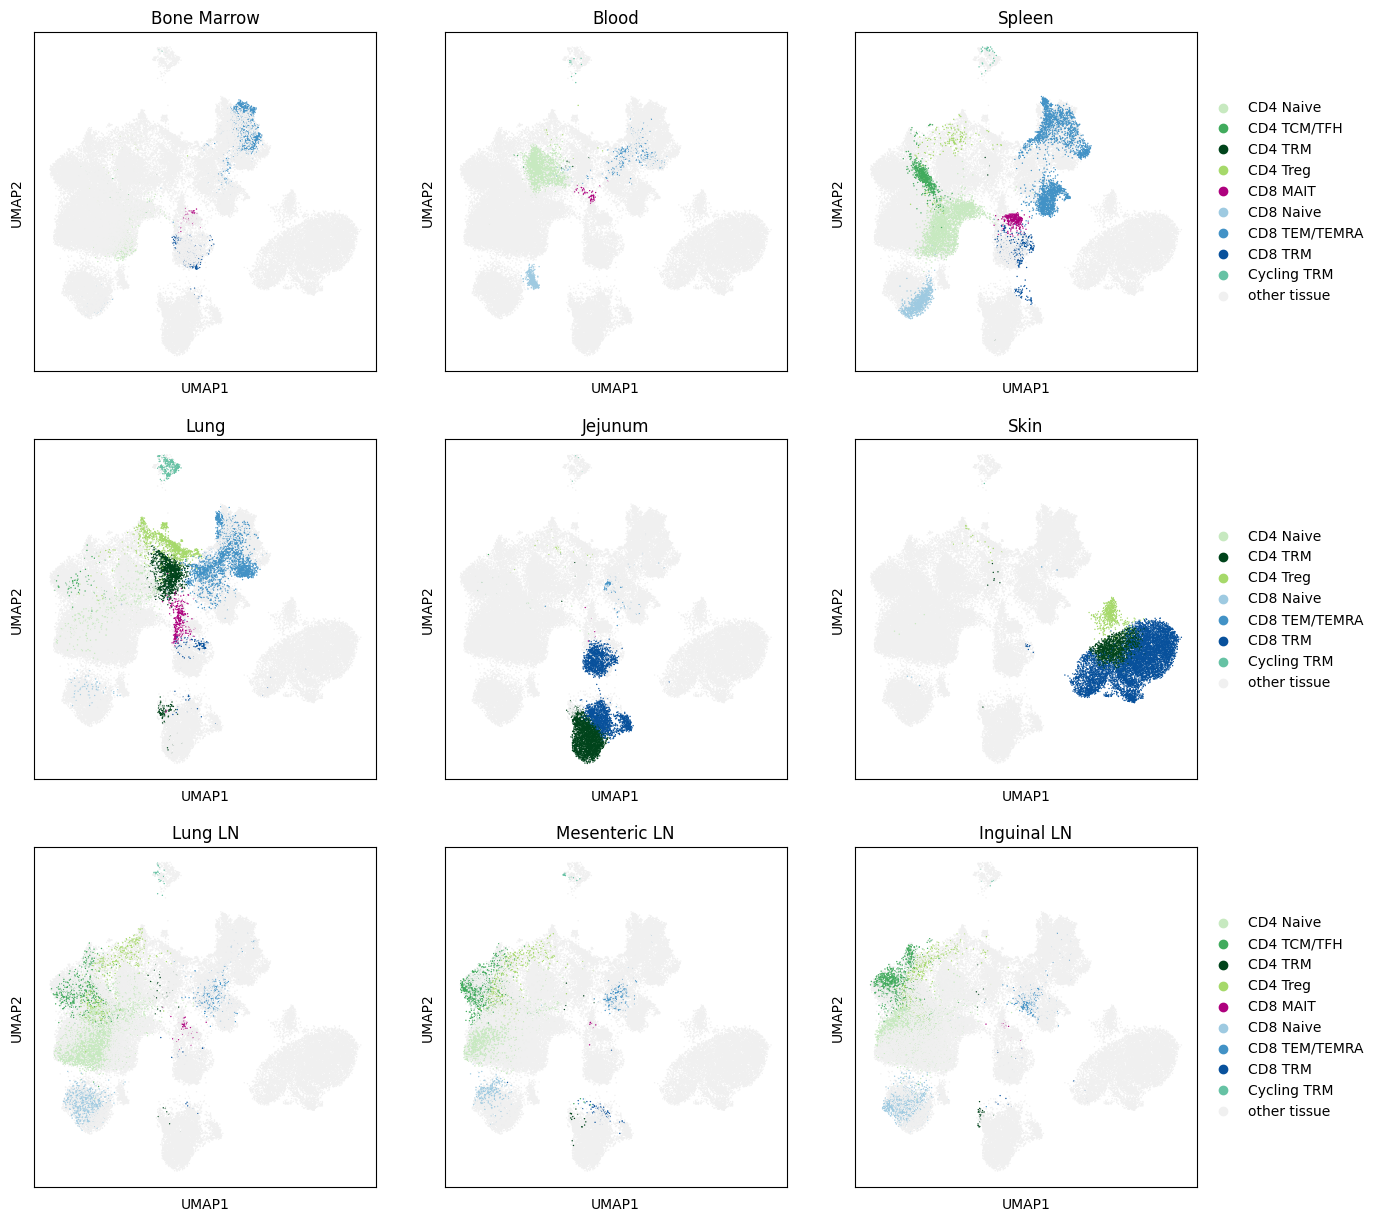

In [304]:
cols_tissue = {
    "CD4 Naive":"#c7e9c0",
    "CD4 TCM/TFH": "#41ab5d",
    "CD4 TRM": "#00441b",
    "CD4 Treg": "#a6d96a",
    "CD8 MAIT": "#ae017e",
    "CD8 Naive": "#9ecae1",
    "CD8 TEM/TEMRA": "#4292c6",
    "CD8 TRM": "#08519c",
    "Cycling TRM": "#66c2a4",
    "other tissue": "#f0f0f0"}

# Clusters by tissue site
tissues = {
    "BM" : "Bone Marrow",
    "BL" : "Blood",
    "SP" : "Spleen",
    "LG" : "Lung",
    "JE" : "Jejunum",
    "SK" : "Skin",
    "LN" : "Lung LN",
    "MN" : "Mesenteric LN",
    "IN" : "Inguinal LN"
}

# Combine subplots
i=0
j=0
fig, axs = plt.subplots(3,3, figsize=(15,15))

for key in tissues.keys():
    # Create new column
    column_name = "clust_"+key
    poon_data.obs[column_name] = np.where(poon_data.obs["tissue"] == key, poon_data.obs["clust"], "other tissue")
    # Plot
    if j<2:
        axs[i,j] = sc.pl.umap(poon_data, color=[column_name], palette=cols_tissue, size=4, title=tissues[key], legend_loc=None, ax=axs[i,j], show=False)
    elif j==2:
        axs[i,j] = sc.pl.umap(poon_data, color=[column_name], palette=cols_tissue, size=4, title=tissues[key], ax=axs[i,j], show=False)
    # Increment
    j=j+1
    if j==3:
        j=0
        i=i+1

# plt.savefig("/Users/scarcy/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnPoonData/poon_umap_by_tissue.jpeg", dpi=300)

<Figure size 1300x500 with 0 Axes>

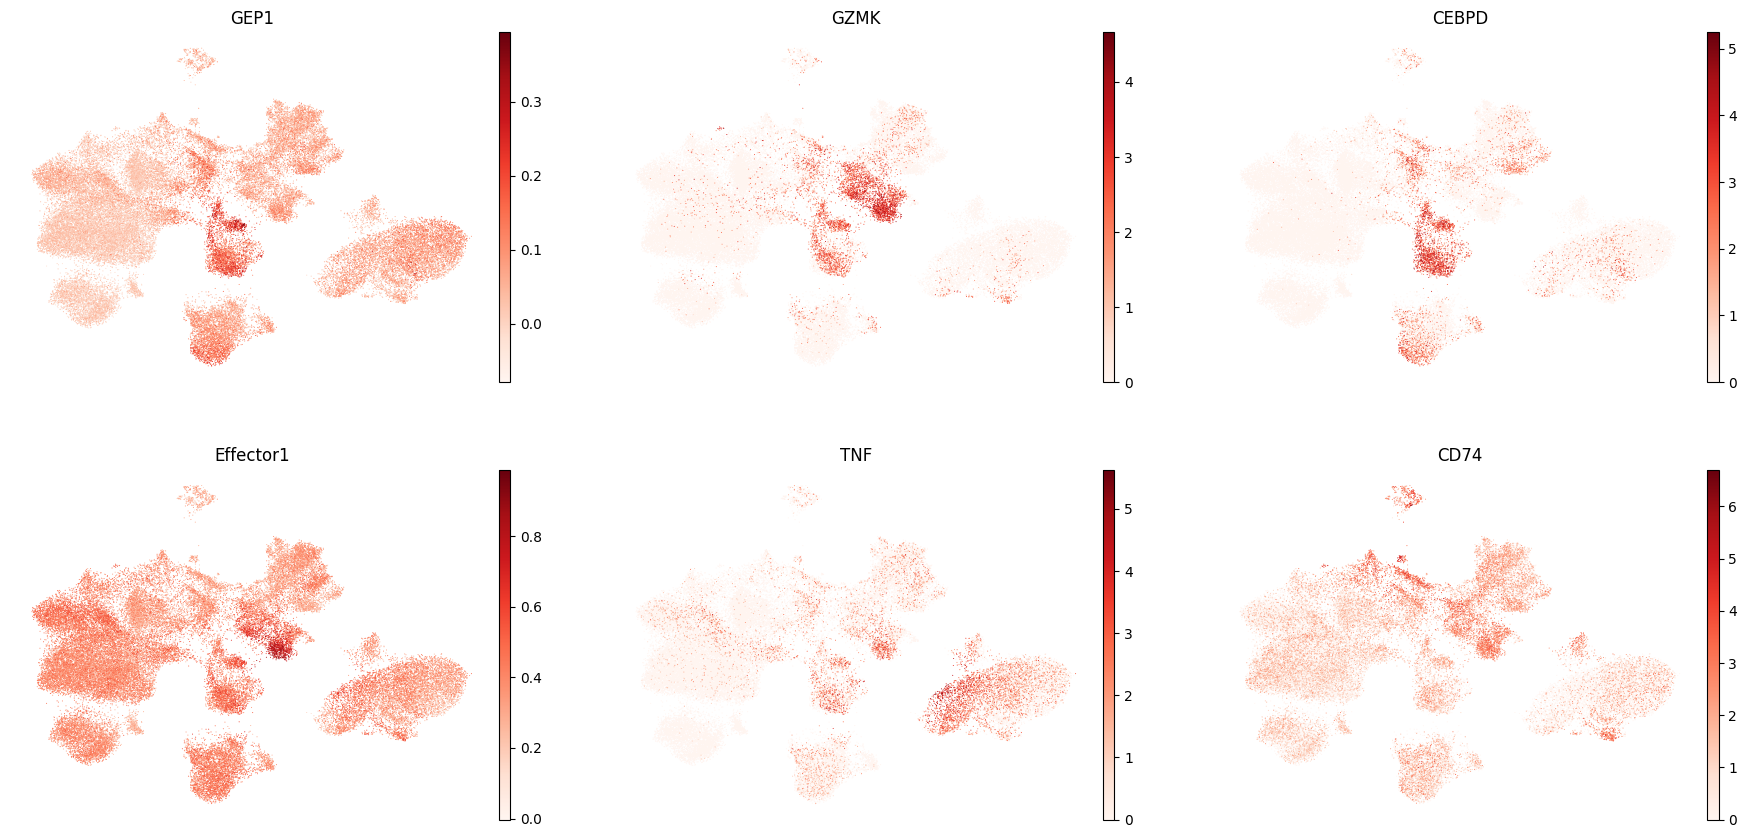

In [311]:
# Effector1 GZMK signature
fig = plt.figure(figsize=(13,5))
sc.pl.umap(poon_data, color=["GEP1", "GZMK", "CEBPD", "Effector1", "TNF", "CD74"], color_map=mpl.cm.Reds, ncols=3, frameon=False, show=False) #, save="poon_umap_gep1"
# plt.savefig("/Users/scarcy/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnPoonData/poon_umap_effector1.jpeg", dpi=300)

[<Axes: title={'center': 'GEP1'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'GZMK'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'CEBPD'}, xlabel='UMAP1', ylabel='UMAP2'>]

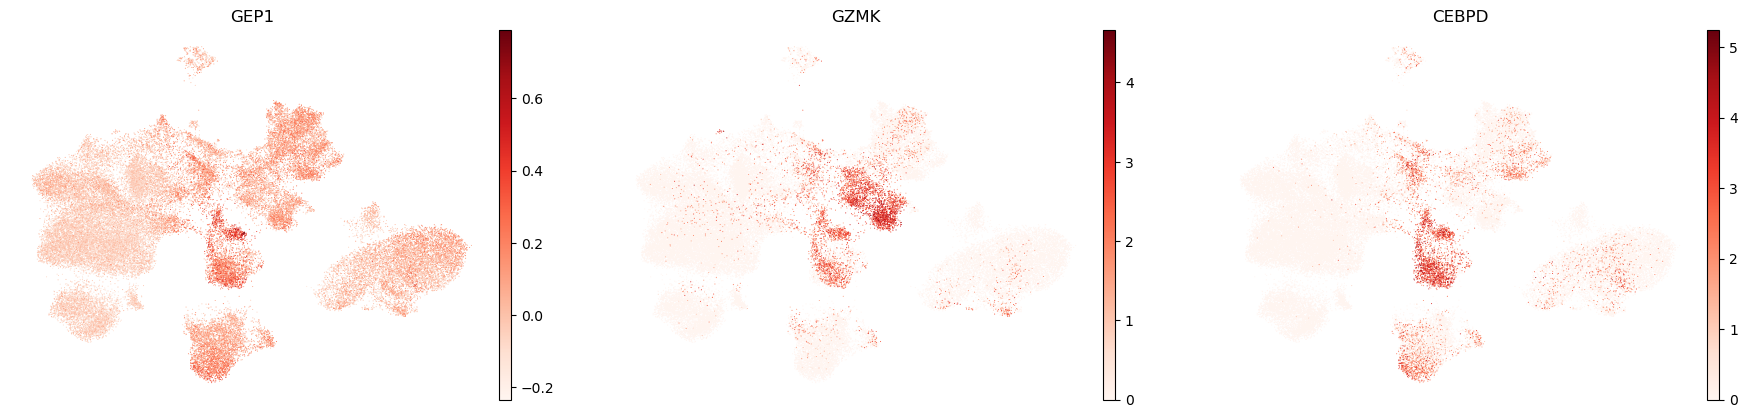

In [30]:
sc.pl.umap(poon_data, color=["GEP1", "GZMK", "CEBPD"], color_map=mpl.cm.Reds, ncols=3, frameon=False, show=False) 

<Figure size 1300x500 with 0 Axes>

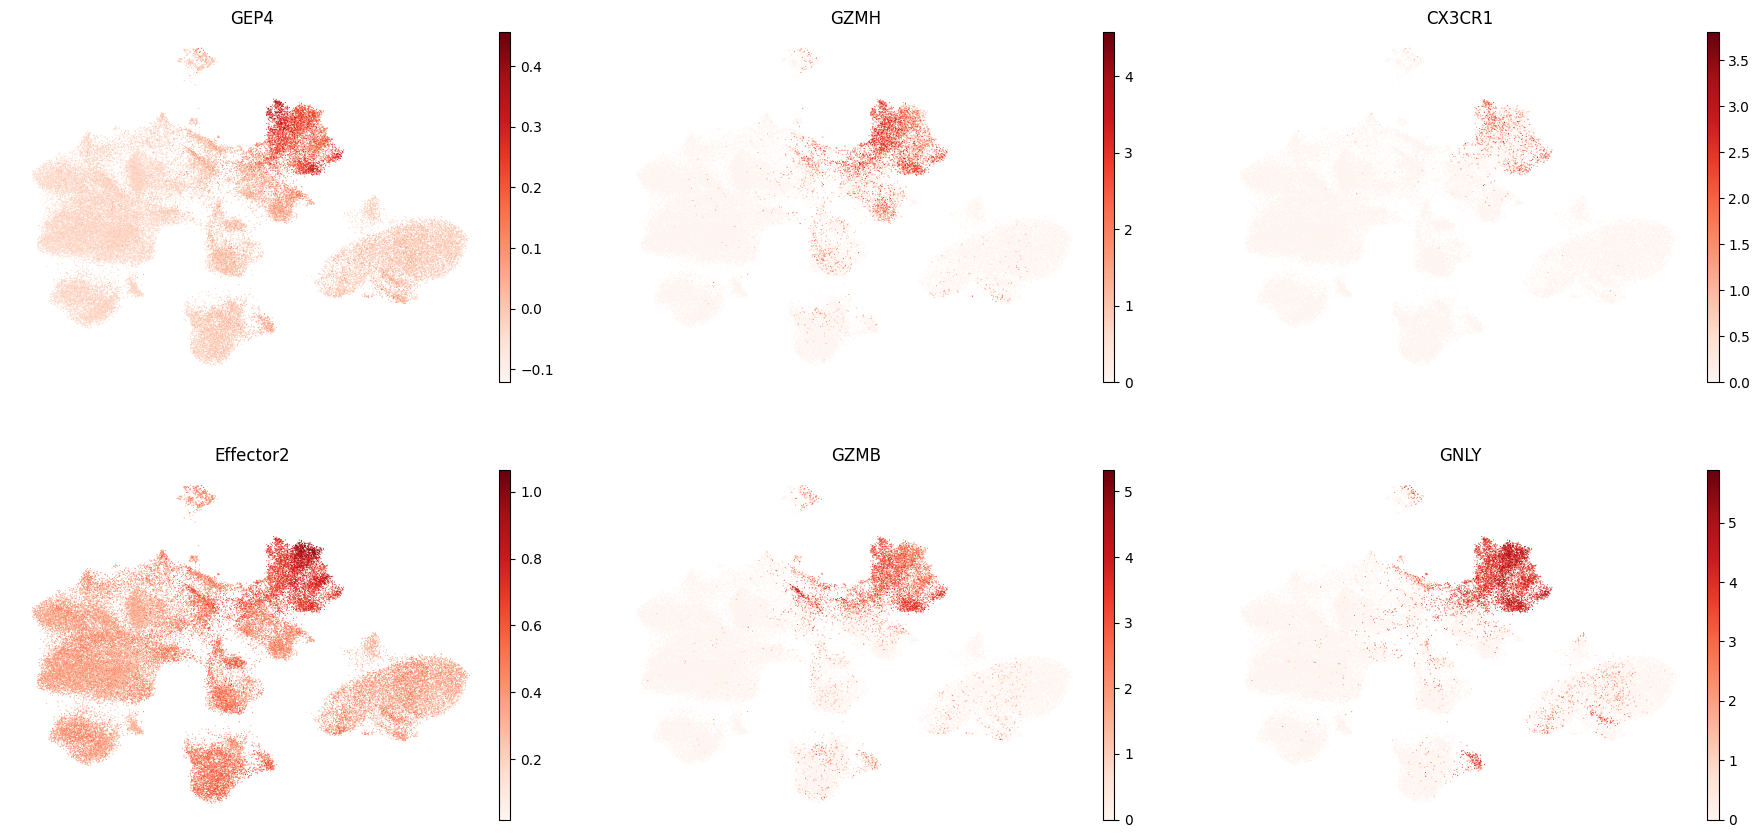

In [313]:
# Effector 2 (GZMB) signature
fig = plt.figure(figsize=(13,5))
sc.pl.umap(poon_data, color=["GEP4", "GZMH", "CX3CR1","Effector2", "GZMB", "GNLY"], color_map=mpl.cm.Reds, ncols=3, frameon=False, show=False) #, save="poon_umap_gep1"
plt.savefig("/Users/scarcy/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnPoonData/poon_umap_effector2.jpeg", dpi=300)

[<Axes: title={'center': 'GEP4'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'GZMH'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'CX3CR1'}, xlabel='UMAP1', ylabel='UMAP2'>]

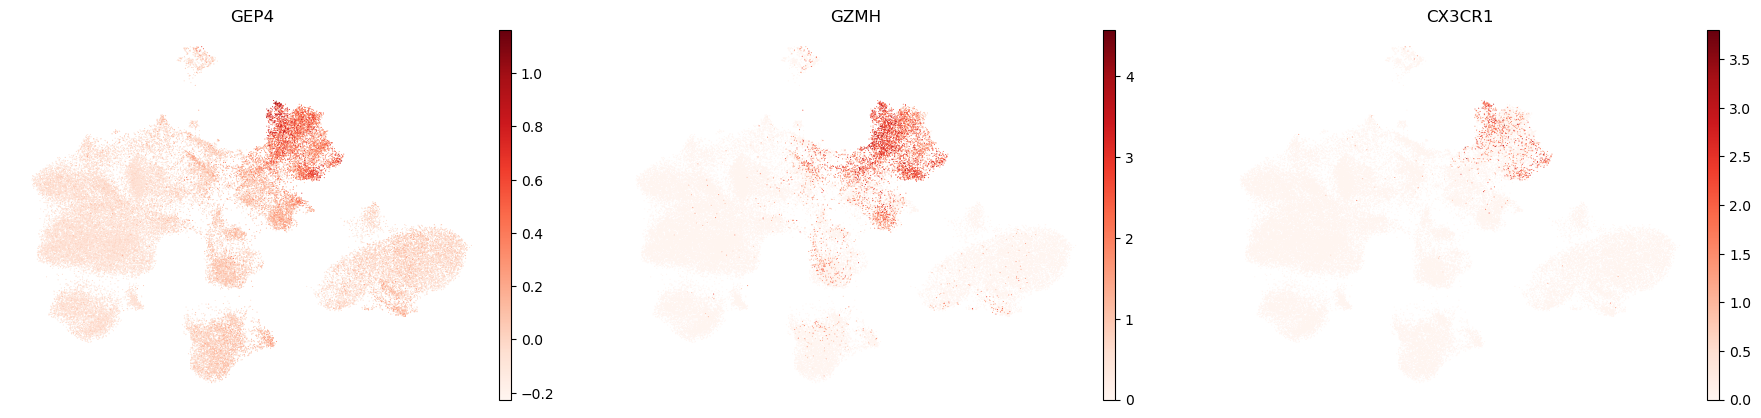

In [31]:
sc.pl.umap(poon_data, color=["GEP4", "GZMH", "CX3CR1"], color_map=mpl.cm.Reds, ncols=3, frameon=False, show=False) #, save="poon_umap_gep1"

[<Axes: title={'center': 'GEP5'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'TCF7'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'SELL'}, xlabel='UMAP1', ylabel='UMAP2'>]

<Figure size 1300x500 with 0 Axes>

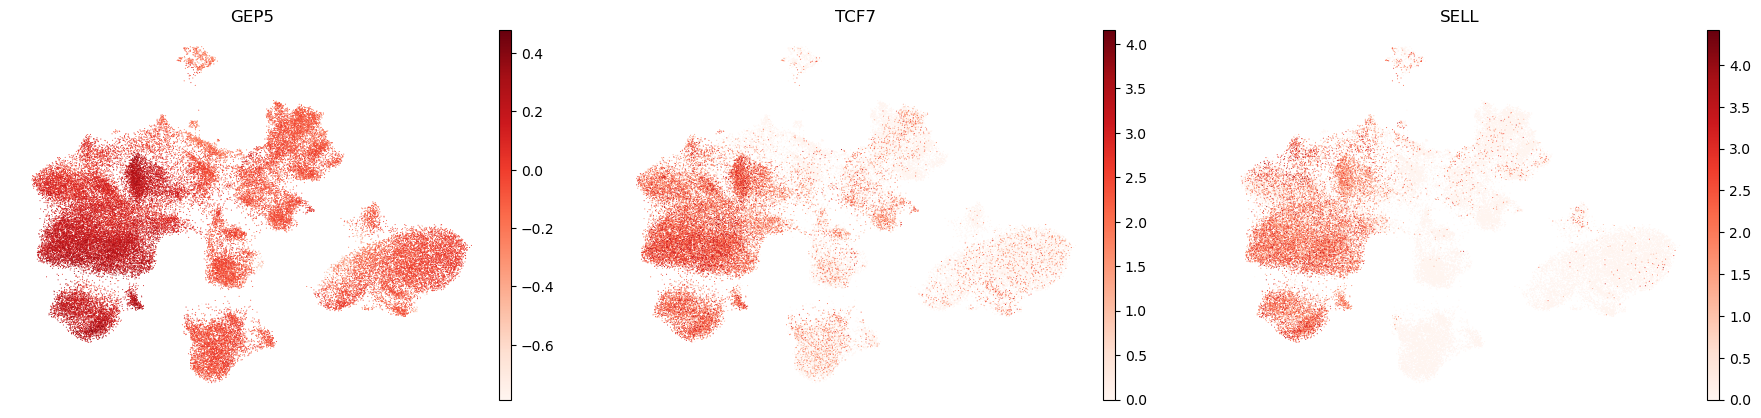

In [32]:
# Naïve
# sc.pl.umap(poon_data, color=["clust","GEP5", "TCF7", "SELL"], color_map=mpl.cm.Reds) #, save="poon_umap_gep4"
fig = plt.figure(figsize=(13,5))
sc.pl.umap(poon_data, color=["GEP5", "TCF7", "SELL"], color_map=mpl.cm.Reds, ncols=3, frameon=False, show=False) #, save="poon_umap_gep1"
# plt.savefig("/Users/scarcy/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnPoonData/poon_umap_naive.jpeg", dpi=300)

<Axes: title={'center': 'GEP6'}, xlabel='UMAP1', ylabel='UMAP2'>

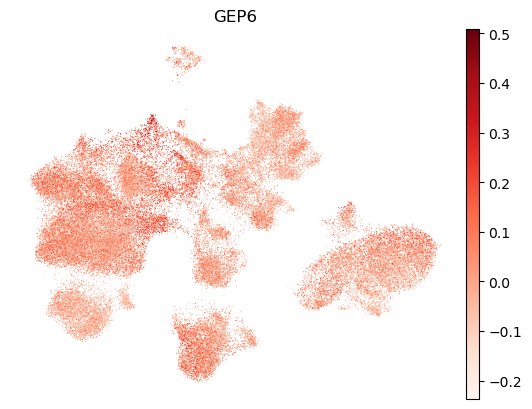

In [33]:
sc.pl.umap(poon_data, color=["GEP6"], color_map=mpl.cm.Reds, ncols=1, frameon=False, show=False)